In [4]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import skimage

In [2]:
vidfile = "../Data/Ideal Lighting.mov"
vidcap = imageio.get_reader(vidfile,format='ffmpeg', mode = "I")
key = vidfile.split("/")[-1].split(".")[0]
vidcap.get_length()

17518

In [5]:
frames = []
for index, frame in enumerate(vidcap):
    if index > 0:
        break
    frames.append(skimage.img_as_ubyte(frame))
    print(index)

0


In [6]:
frames[0].shape

(2160, 3840, 3)

In [8]:
vid = np.array(frames)

In [9]:
vid.shape

(1, 2160, 3840, 3)

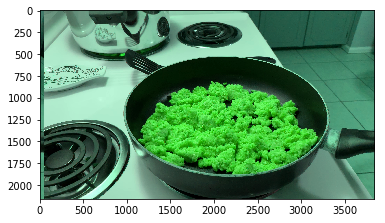

In [10]:
plt.imshow(vid[0,:,:,0:3])

In [30]:
vid[0].shape

(2160, 3840, 3)

In [33]:
matplotlib.rcParams['figure.figsize'] = (15, 9)

In [62]:
np.max(vid[0])

255

In [54]:
import skimage

In [60]:
vid[0]

array([[[ 13,  10,  40],
        [ 98,  97, 115],
        [101,  41,  32],
        ...,
        [ 64, 126, 109],
        [ 65, 126, 109],
        [ 65, 127, 110]],

       [[ 66, 128, 111],
        [ 67, 128, 111],
        [ 67, 130, 113],
        ...,
        [ 64, 126, 109],
        [ 65, 126, 109],
        [ 65, 127, 110]],

       [[ 66, 127, 110],
        [ 66, 127, 110],
        [ 66, 128, 111],
        ...,
        [ 64, 126, 109],
        [ 65, 126, 109],
        [ 65, 126, 109]],

       ...,

       [[ 89, 167, 129],
        [ 88, 167, 129],
        [ 88, 165, 127],
        ...,
        [ 86, 165, 127],
        [ 86, 167, 129],
        [ 88, 167, 129]],

       [[ 88, 167, 129],
        [ 88, 167, 129],
        [ 88, 165, 127],
        ...,
        [ 86, 165, 127],
        [ 86, 167, 129],
        [ 88, 167, 129]],

       [[ 88, 167, 129],
        [ 88, 167, 129],
        [ 88, 165, 127],
        ...,
        [ 86, 165, 127],
        [ 86, 167, 129],
        [ 88, 167, 129]]

In [73]:
vid2 =np.copy(vid[0])

In [71]:
vid2[:,:,0] = 0

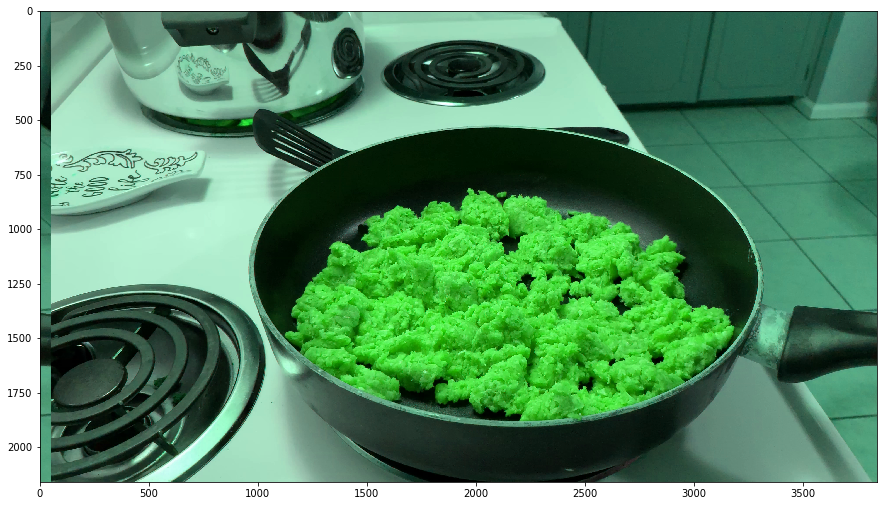

In [74]:
plt.imshow(vid2)

In [75]:
vid2

array([[[ 13,  10,  40],
        [ 98,  97, 115],
        [101,  41,  32],
        ...,
        [ 64, 126, 109],
        [ 65, 126, 109],
        [ 65, 127, 110]],

       [[ 66, 128, 111],
        [ 67, 128, 111],
        [ 67, 130, 113],
        ...,
        [ 64, 126, 109],
        [ 65, 126, 109],
        [ 65, 127, 110]],

       [[ 66, 127, 110],
        [ 66, 127, 110],
        [ 66, 128, 111],
        ...,
        [ 64, 126, 109],
        [ 65, 126, 109],
        [ 65, 126, 109]],

       ...,

       [[ 89, 167, 129],
        [ 88, 167, 129],
        [ 88, 165, 127],
        ...,
        [ 86, 165, 127],
        [ 86, 167, 129],
        [ 88, 167, 129]],

       [[ 88, 167, 129],
        [ 88, 167, 129],
        [ 88, 165, 127],
        ...,
        [ 86, 165, 127],
        [ 86, 167, 129],
        [ 88, 167, 129]],

       [[ 88, 167, 129],
        [ 88, 167, 129],
        [ 88, 165, 127],
        ...,
        [ 86, 165, 127],
        [ 86, 167, 129],
        [ 88, 167, 129]]

In [76]:
vid3 = np.copy(vid2)

In [85]:
vid3[:,vid3.shape[1]-51:vid3.shape[1]] = vid2[:,0:51]
vid3[:,0:vid3.shape[1]-50] = vid2[:,50:]

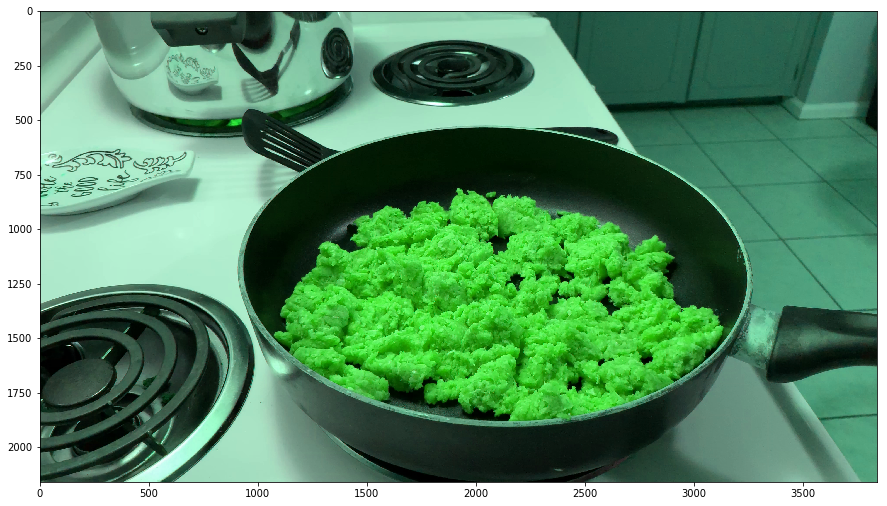

In [86]:
plt.imshow(vid3)

In [100]:
vid4 = np.copy(vid3)

In [109]:
vid4[:,:,0] = vid3[:,:,1]
vid4[:,:,1] = vid3[:,:,2]
vid4[:,:,2] = vid3[:,:,0]

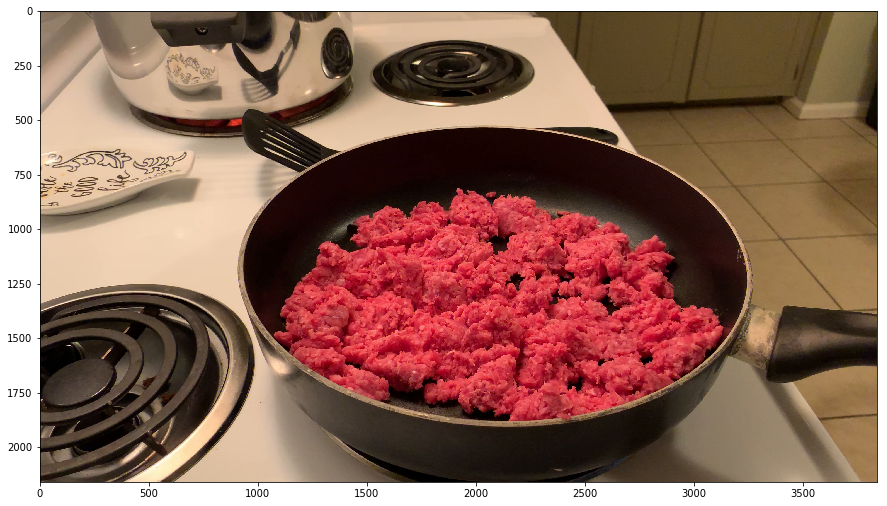

In [110]:
plt.imshow(vid4)

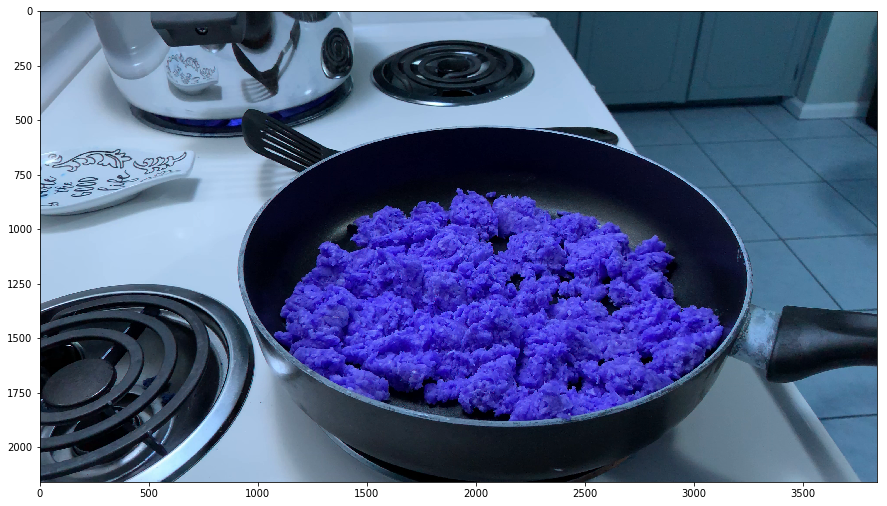

In [113]:
vid4[:,:,0] = vid3[:,:,0]
vid4[:,:,1] = vid3[:,:,2]
vid4[:,:,2] = vid3[:,:,1]
plt.imshow(vid4)

In [114]:
vidcap.get_length()

17518

In [132]:
frames = []
for index, frame in enumerate(vidcap):
    if index % 900 > 0:
        continue
    
    #fix for ffmpeg issue on Andrew's compututer
    frame2 = np.copy(frame)
    frame2[:,vid3.shape[1]-51:vid3.shape[1]] = frame[:,0:51]
    frame2[:,0:vid3.shape[1]-50] = frame[:,50:]
    
    #reorder channels in correct order
    frame = np.copy(frame2)
    frame[:,:,0] = frame2[:,:,1]
    frame[:,:,1] = frame2[:,:,2]
    frame[:,:,2] = frame2[:,:,0]
    print(index)
    frames.append(skimage.img_as_ubyte(frame))
vid = np.array(frames)

0
900
1800
2700
3600
4500
5400
6300
7200
8100
9000
9900
10800
11700
12600
13500
14400
15300
16200
17100


In [128]:
vid.shape

(17, 2160, 3840, 3)

In [129]:
np.save("nonideal_900f.npy",vid)

In [134]:
for i in range(vid.shape[0]):
    imageio.imwrite("ideal_frame{}.png".format(i*900),vid[i])